In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
file_path = '/kaggle/input/bank-marketing/bank-additional-full.csv'
data = pd.read_csv(file_path, sep=";")

# Optimize memory usage by downcasting numeric columns
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    data[col] = pd.to_numeric(data[col], downcast='float')

# Encode categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    if col != 'y':  # Exclude the target variable for GPC from encoding
        data[col] = le.fit_transform(data[col])

# Convert target variable to binary classes for GPC
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Sample the dataset (reduce to 10% for testing purposes)
data_sample = data.sample(frac=0.1, random_state=42)

# Split data into features and target variable
X_sample = data_sample.drop('y', axis=1)
y_sample = data_sample['y']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Gaussian Process Classification (GPC)
# Initialize and fit the Gaussian Process Classifier
gpc = GaussianProcessClassifier(kernel=RBF(length_scale=1.0))
gpc.fit(X_train_scaled, y_train)

# Make predictions for classification
y_pred_gpc = gpc.predict(X_test_scaled)

# Evaluate the GPC model
accuracy = accuracy_score(y_test, y_pred_gpc)
precision = precision_score(y_test, y_pred_gpc)
recall = recall_score(y_test, y_pred_gpc)
f1 = f1_score(y_test, y_pred_gpc)
roc_auc = roc_auc_score(y_test, y_pred_gpc)

print("\nGaussian Process Classification (GPC) Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")



Gaussian Process Classification (GPC) Performance:
Accuracy: 0.889967637540453
Precision: 0.696969696969697
Recall: 0.2839506172839506
F1 Score: 0.4035087719298246
ROC-AUC Score: 0.6326643216773571


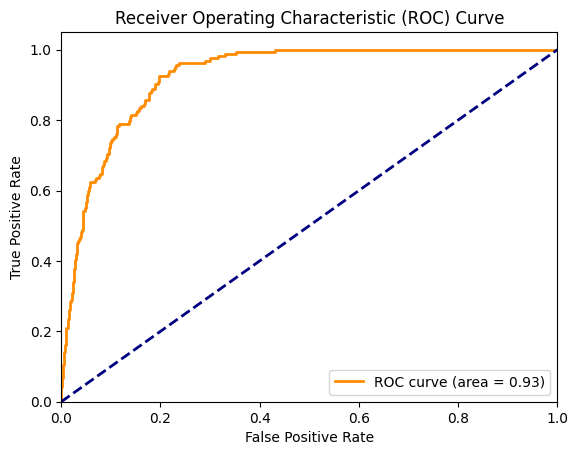

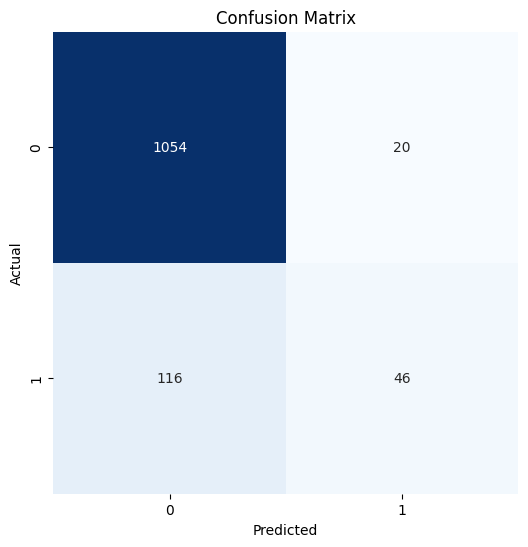

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1074
           1       0.70      0.28      0.40       162

    accuracy                           0.89      1236
   macro avg       0.80      0.63      0.67      1236
weighted avg       0.87      0.89      0.87      1236



In [2]:
# Import necessary libraries for plotting and evaluation
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import seaborn as sns

# Make predictions and get probabilities for ROC AUC curve
y_pred_gpc = gpc.predict(X_test_scaled)
y_prob_gpc = gpc.predict_proba(X_test_scaled)[:, 1]

# Plot ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_gpc)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gpc)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gpc))


In [3]:
# Import necessary libraries
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the kernel for Gaussian Process Regression (RBF kernel)
kernel = C(1.0, (1e-4, 1e1)) * RBF(length_scale=1.0, length_scale_bounds=(1e-4, 1e1))

# Initialize and fit the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gpr.fit(X_train, y_train)

# Make predictions
y_pred_gpr = gpr.predict(X_test)

# Evaluate the GPR model
mae = mean_absolute_error(y_test, y_pred_gpr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gpr))
r2 = r2_score(y_test, y_pred_gpr)

# Print the performance metrics
print("Gaussian Process Regression (GPR) Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


/opt/conda/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Gaussian Process Regression (GPR) Performance:
Mean Absolute Error (MAE): 0.1678635674123224
Root Mean Squared Error (RMSE): 0.3542716202365315
R² Score: -0.10202227438140121
